<a href="https://colab.research.google.com/github/mkaraca25/Python_Numpy_Pandas_Matplotlib_Seaborn/blob/main/Akbank%26GlobalAIHub_Veri_G%C3%B6rselle%C5%9Ftirme_Canl%C4%B1_Egitimi_2_G%C3%BCn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(rc={"figure.figsize":(5,5)})

In [166]:
df=pd.read_csv("world-happiness-report.csv")
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [168]:
df['Country name'].value_counts()

Italy                 15
Israel                15
Dominican Republic    15
Bangladesh            15
France                15
                      ..
Oman                   1
Guyana                 1
Cuba                   1
Suriname               1
Maldives               1
Name: Country name, Length: 166, dtype: int64

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [170]:
from os import mkdir


In [171]:
try:
  mkdir("plots")
except:
  pass
mypath="plots"

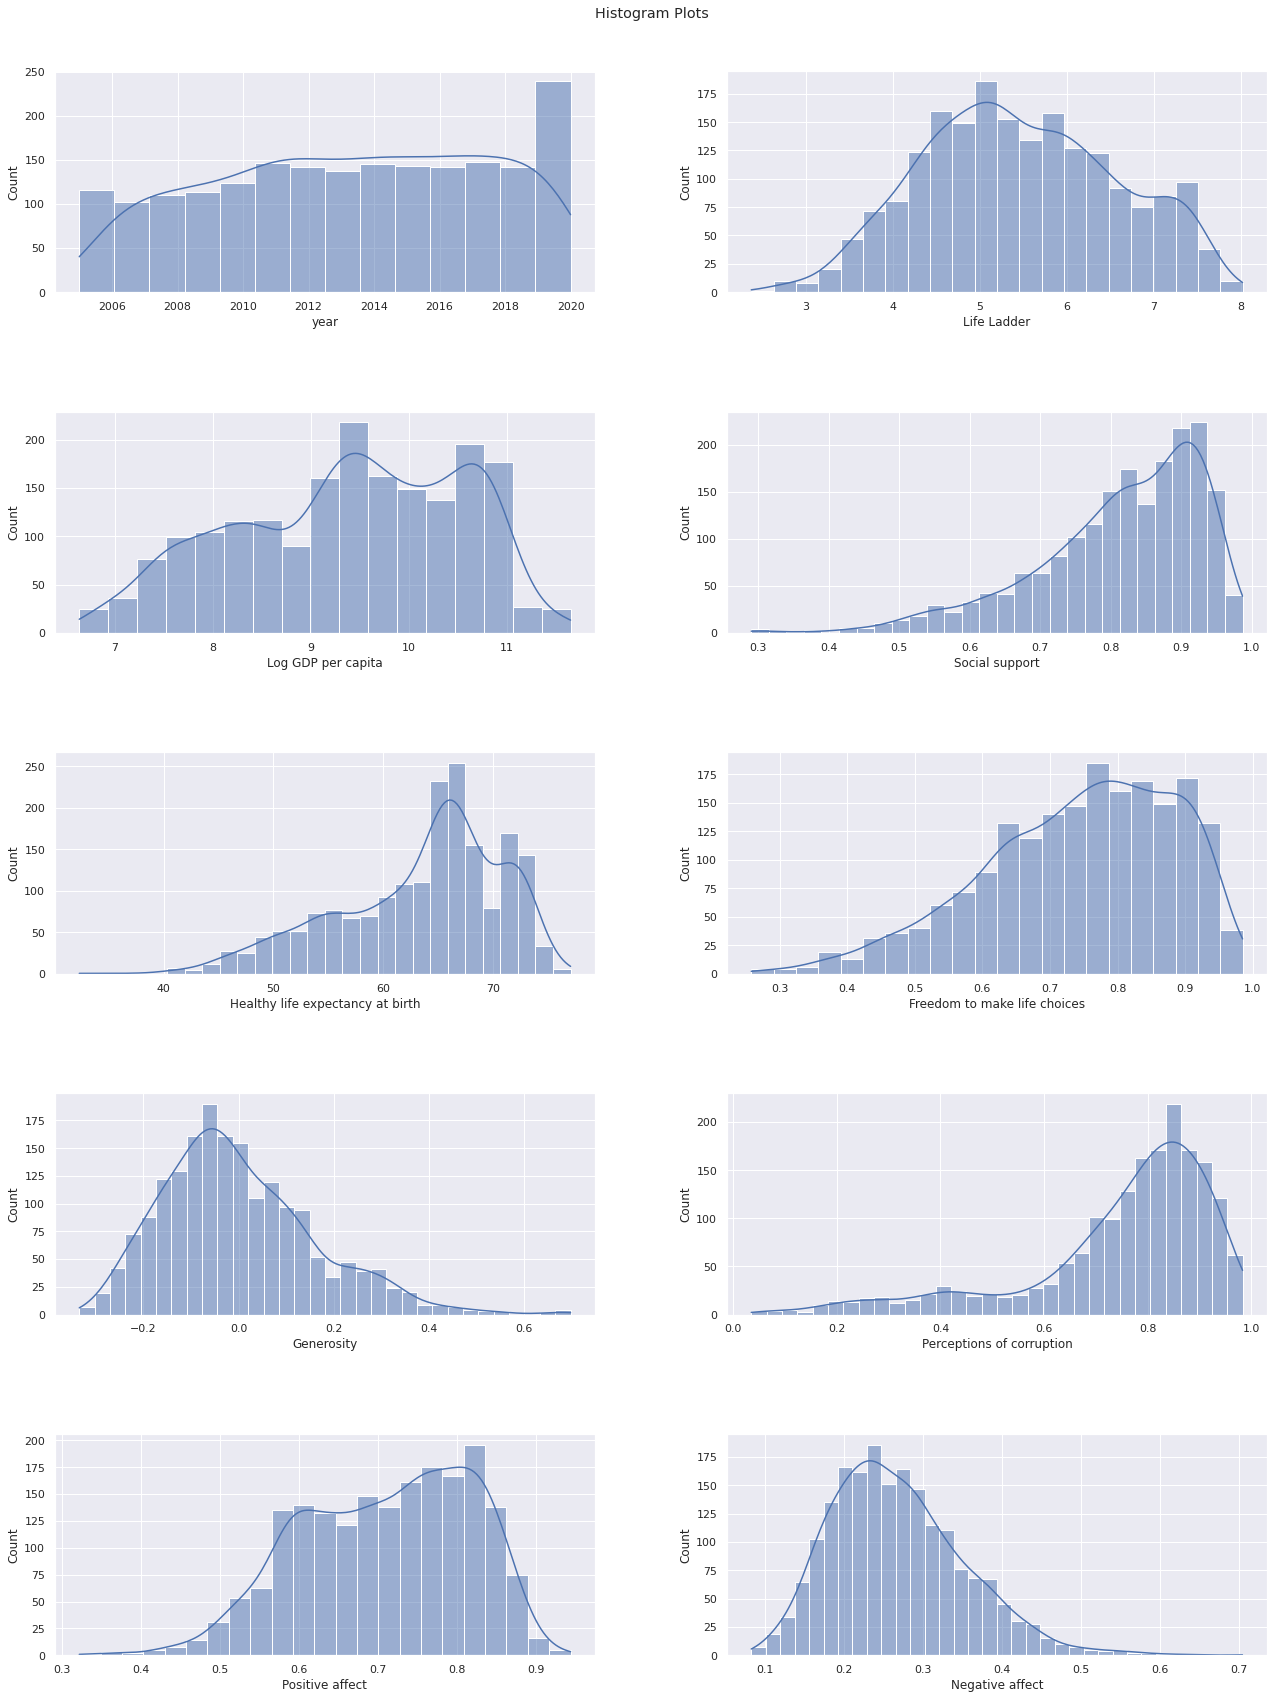

In [225]:
f,axes=plt.subplots(5,2, figsize=(20,25))
f.tight_layout(pad=8)
f.suptitle("Histogram Plots")
cols=df.select_dtypes(exclude="object").columns
x_axes=0
y_axes=0
for col in cols:
  sns.histplot(data=df,x=col,kde=True,ax=axes[x_axes,y_axes])
  if y_axes==1:
    y_axes=0
    x_axes+=1
  else:
    y_axes+=1
plt.savefig("plots/histogram_plots.png")
plt.show()

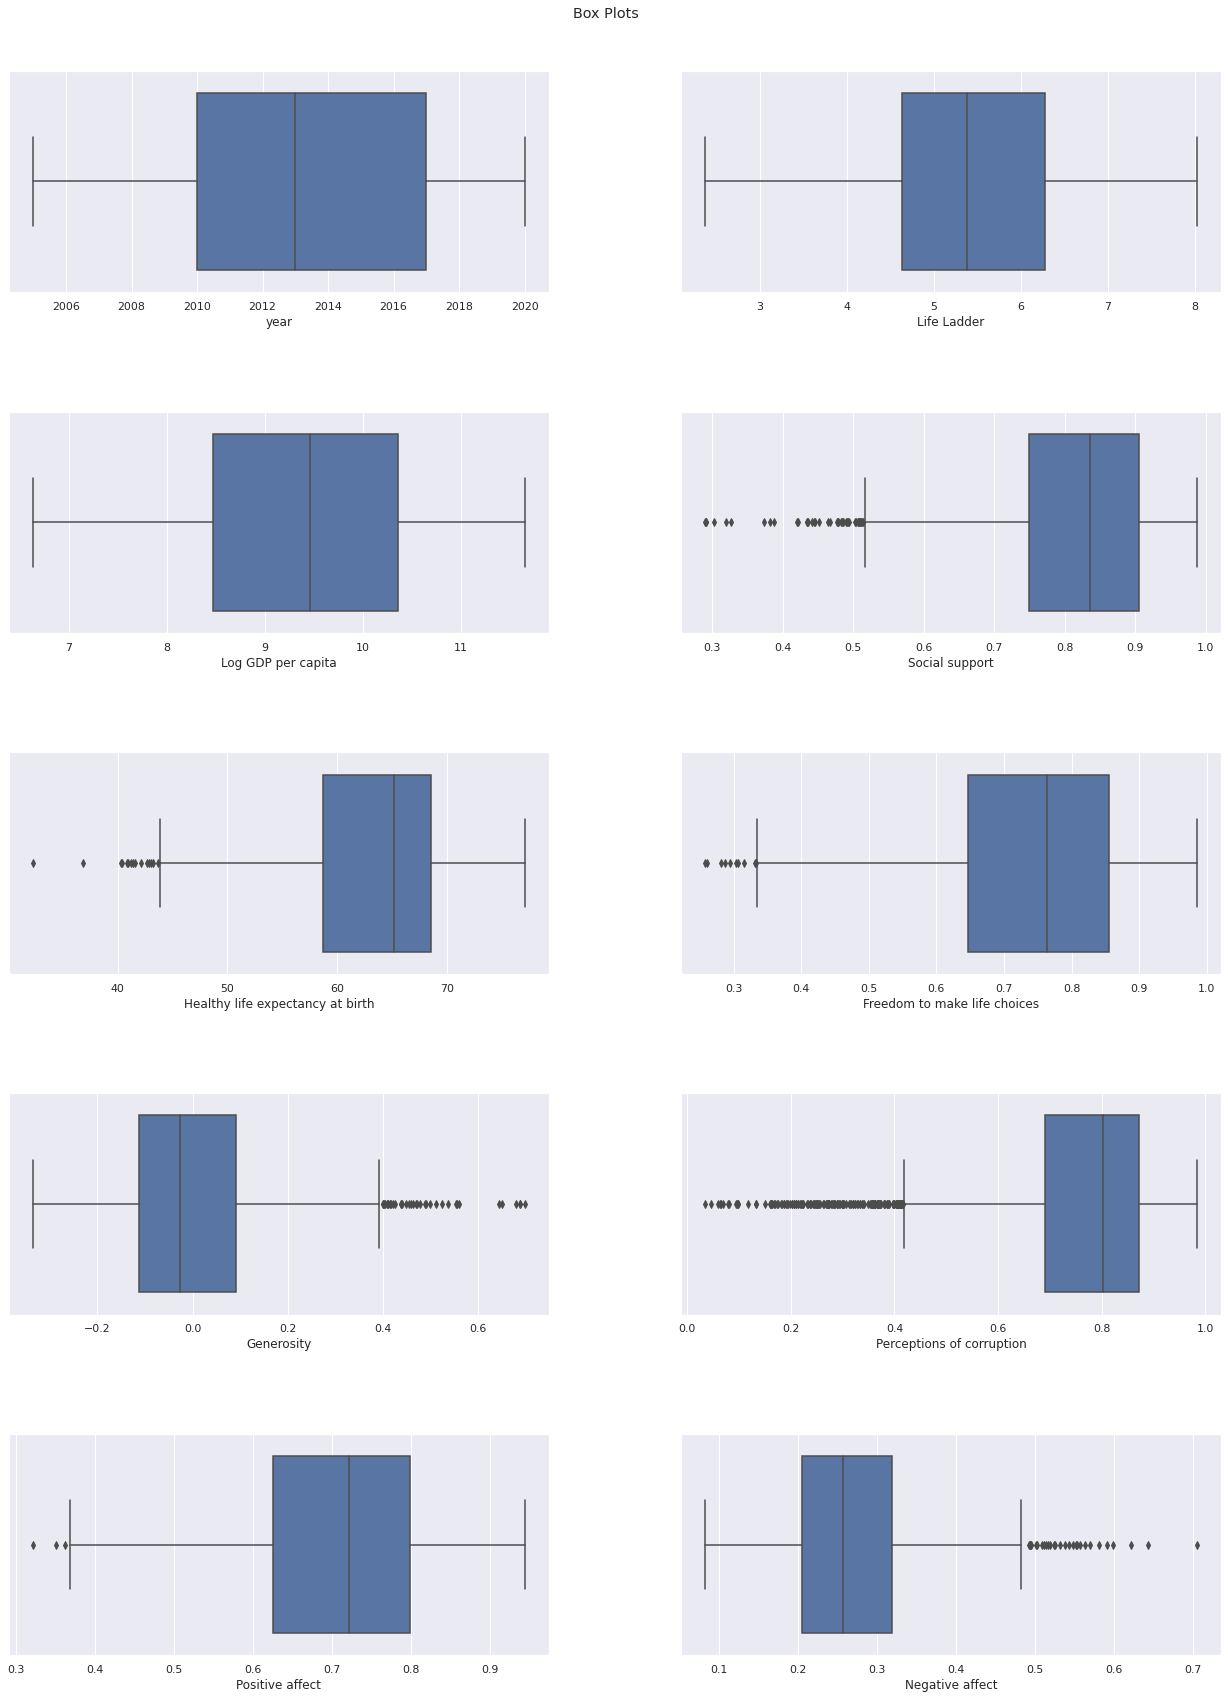

In [226]:
f,axes=plt.subplots(5,2, figsize=(20,25))
f.tight_layout(pad=8)
f.suptitle("Box Plots")
cols=df.select_dtypes(exclude="object").columns
x_axes=0
y_axes=0
for col in cols:
  sns.boxplot(data=df,x=col,ax=axes[x_axes,y_axes])
  if y_axes==1:
    y_axes=0
    x_axes+=1
  else:
    y_axes+=1
plt.savefig("plots/Box_plots.png")
plt.show()

In [212]:
year_group=df.groupby(by="year").sum()

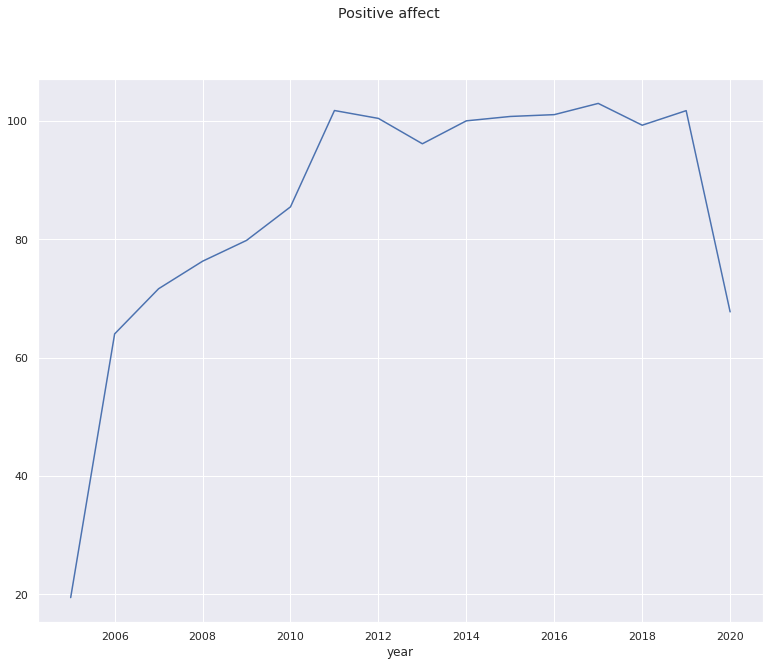

In [232]:
plt.suptitle("Positive affect")
year_group["Positive affect"].plot()
plt.savefig("plots/Positive affect.png")

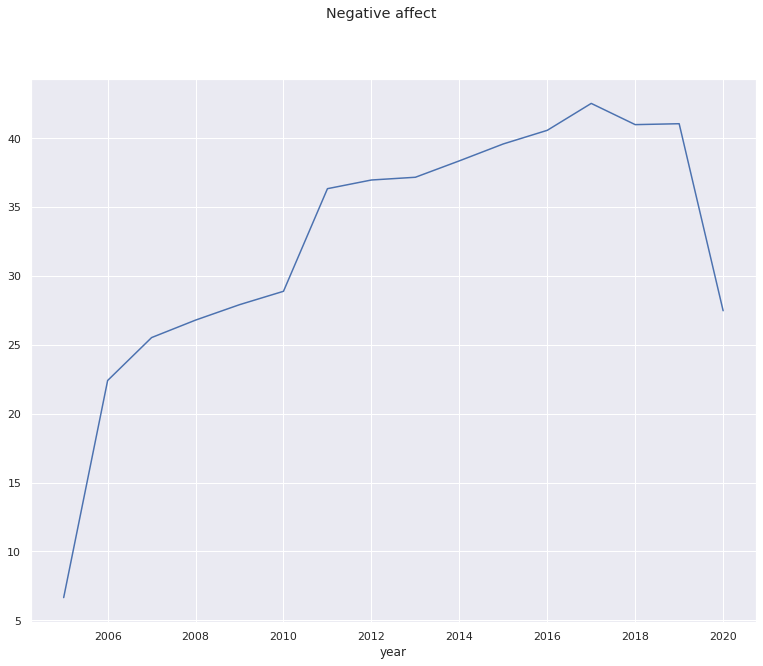

In [231]:
plt.suptitle("Negative affect")
year_group["Negative affect"].plot()
plt.savefig("plots/Negative_affect_plot.png")

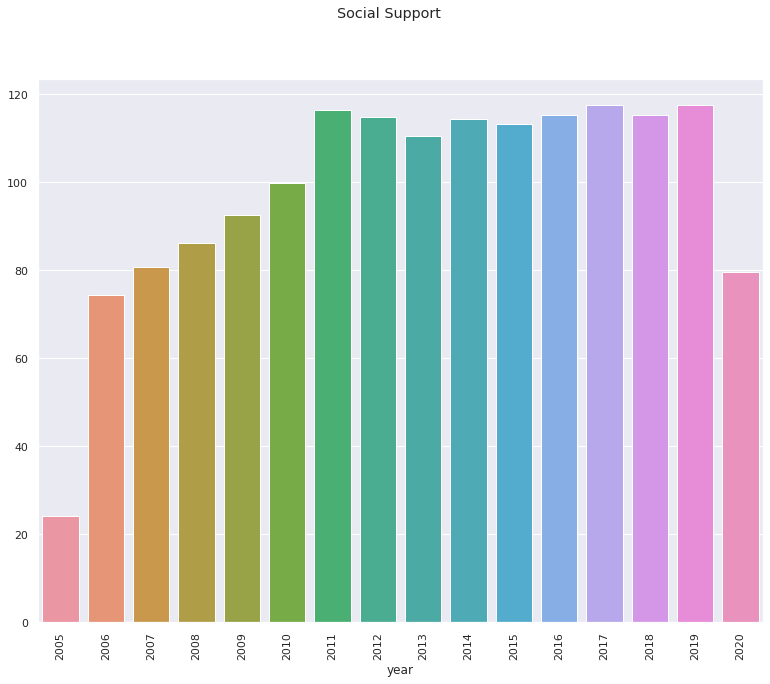

In [233]:
ax1=sns.barplot(x=year_group.index,y=year_group["Social support"].values)
plt.suptitle("Social Support")
ax1.tick_params(axis="x",rotation=90)
plt.savefig("plots/SocialSupport.png")

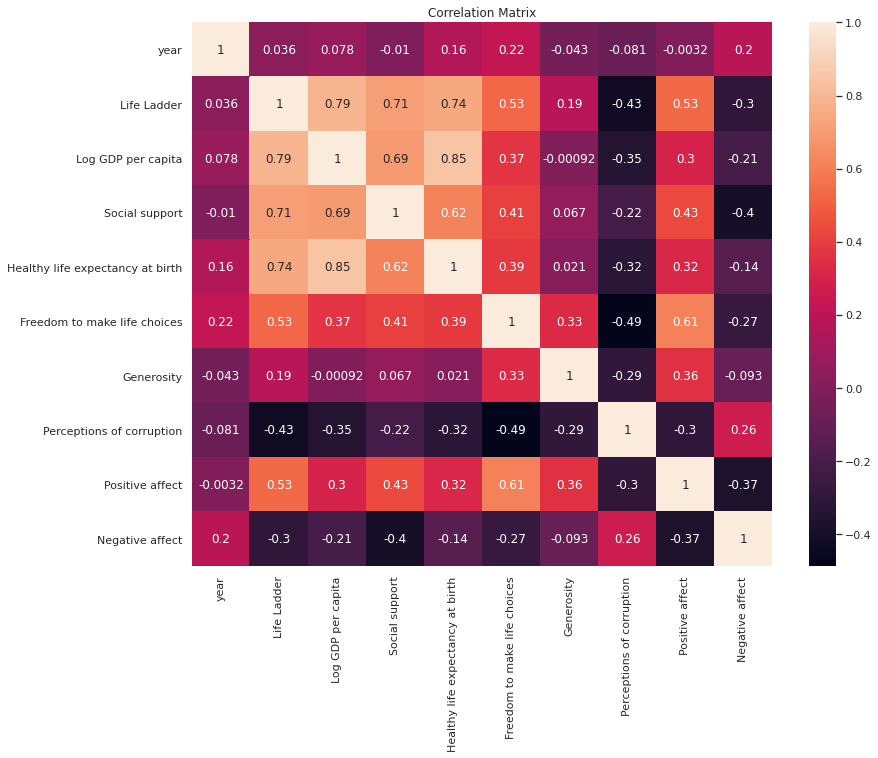

In [216]:
sns.set(rc={"figure.figsize":(13,10)})
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True)
plt.savefig("plots/Correlation Matrix.png")

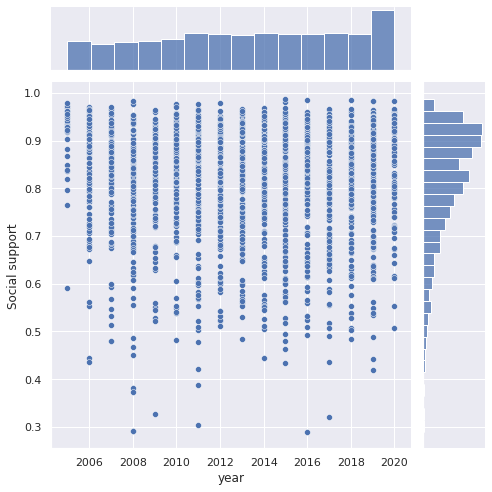

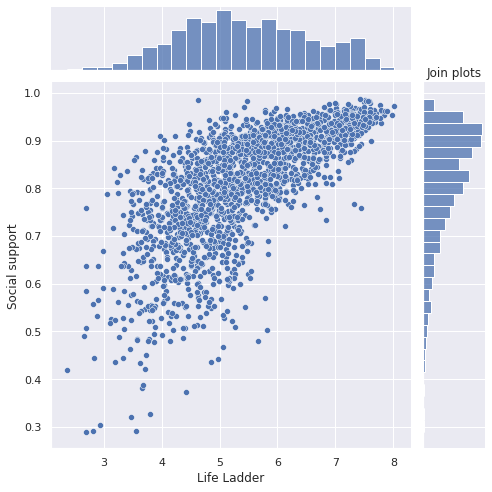

In [242]:
sns.jointplot(data=df,x="year",y="Social support",height=7)
sns.jointplot(data=df,x="Life Ladder",y="Social support",height=7)
plt.title("Join plots")
plt.savefig("plots/Joinplots.png")

In [235]:
import os
from os import  listdir,mkdir
from os.path import isfile,join

In [236]:
all_files=os.listdir("plots")
reports=[f"plots/{file}" for file in all_files]

In [237]:
reports

['plots/Positive affect.png',
 'plots/Negative_affect_plot.png',
 'plots/Correlation Matrix.png',
 'plots/Joinplots.png',
 'plots/Box_plots.png',
 'plots/SocialSupport.png',
 'plots/histogram_plots.png',
 'plots/Bar plots.png']

In [238]:
!pip install FPDF

In [239]:
from fpdf import  FPDF

In [240]:
WIDTH=210
HEIGHT=297
pdf=FPDF()
pdf.set_font("Arial","B",56)
pdf.add_page()
pdf.cell(190,10,txt="REPORT",align="C")
for report in reports:
  pdf.add_page()
  pdf.set_font("Arial","B",24)
  pdf.cell(190,20,txt=report,align="C")
  pdf.image(report,5,30,WIDTH-5)
pdf.output("Countries_report.pdf")


''